In [ ]:
from neural import fit_surrogate
from pycalphad import Database

Loop through all phases below

In [ ]:
# dbf = Database('Mg_Si_Zn.tdb')
# comps = ['MG', 'SI', 'ZN', 'VA']
# temp_range = (300, 600, 0.5)
# num_phases = len(dbf.phases)
# results = {}
# for phase_name in sorted(dbf.phases):
#     print(f'Fitting {phase_name}')
#     model, history = fit_surrogate(dbf, comps, phase_name, temp_range)
#     results[phase_name] = (model, history)

Loop through all temperatures

In [ ]:
# dbf = Database('Mg_Si_Zn.tdb')
# comps = ['MG', 'SI', 'ZN', 'VA']

# num_phases = len(dbf.phases)
# results = {}
# max_temp_range = (600,1000,1500,2000)
# phase_name_list = ['LIQUID', 'BCC_A2', 'DIAMOND_A4', 'FCC_A1', 'HCP_A3', 'HCP_ZN', 'MG2SI', 'MG2ZN11', 'MG2ZN3', 'MG51ZN20', 'MGZN', 'MGZn2']
# index = 0
# step = 5
# for max_temp in max_temp_range:
#     temp_range = (300, max_temp, step)
#     print(max_temp)
#     model, history = fit_surrogate(dbf, comps, phase_name_list[index], temp_range)
#     results[str(max_temp)] = (model, history)

Single temp and phase below

In [66]:
dbf = Database('Mg_Si_Zn.tdb')
comps = ['MG', 'SI', 'ZN', 'VA']
starting_temp = 300
max_temp = 600
step = 0.5
save_string = str(starting_temp)+'-to-'+str(max_temp)+'-step-'+str(step)
temp_range = (starting_temp, max_temp, step)
num_phases = len(dbf.phases)
results = {}
phase_name_list = ['LIQUID', 'BCC_A2', 'DIAMOND_A4', 'FCC_A1', 'HCP_A3', 'HCP_ZN', 'MG2SI', 'MG2ZN11', 'MG2ZN3', 'MG51ZN20', 'MGZN', 'MGZn2']
index = 0
phases = sorted(dbf.phases)
model, history, x_test, y_test = fit_surrogate(dbf, comps, phase_name_list[index], temp_range)
results[phase_name_list[index]] = (model, history)

x_test_backup, y_test_backup = x_test, y_test

c:\Users\zhenyap\pycalphad\neural.py:88: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  filtered = res.drop_vars('component').to_dataframe()[['Y', 'GM']] \


temp_scale is 599.5
(71550, 4) (71550,)
Epoch 1/20
2236/2236 [==============================] - 9s 3ms/step - loss: 3448.5212
Epoch 2/20
2236/2236 [==============================] - 7s 3ms/step - loss: 123.6469
Epoch 3/20
2236/2236 [==============================] - 5s 2ms/step - loss: 88.4589
Epoch 4/20
2236/2236 [==============================] - 6s 3ms/step - loss: 76.2593
Epoch 5/20
2236/2236 [==============================] - 7s 3ms/step - loss: 67.1586
Epoch 6/20
2236/2236 [==============================] - 9s 4ms/step - loss: 62.1767
Epoch 7/20
2236/2236 [==============================] - 9s 4ms/step - loss: 57.8938
Epoch 8/20
2236/2236 [==============================] - 7s 3ms/step - loss: 55.9052
Epoch 9/20
2236/2236 [==============================] - 6s 2ms/step - loss: 52.7250
Epoch 10/20
2236/2236 [==============================] - 6s 3ms/step - loss: 50.6607
Epoch 11/20
 402/2236 [====>.........................] - ETA: 4s - loss: 49.2155

In [ ]:
print(x_test_backup.shape, y_test_backup.shape)
x_test, y_test = x_test_backup, y_test_backup

(23850, 4) (23850,)


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
pred = model.predict(x_test)
pred_error = y_test-pred
x_test = np.asarray(x_test)
pred_error = np.asarray(pred_error)
inds = x_test[:,0].argsort()
print('inds shape', inds.shape)
x_test = x_test[inds]
pred_error_sorted = pred_error[inds]
print('xtest', x_test.shape)
print('pred_error_sorted', pred_error_sorted.shape)
print('pred_error', pred_error_sorted)
print('Validation loss is', pred_error)

746/746 [==============================] - 2s 2ms/step
inds shape (23850,)
xtest (23850, 4)
pred_error_sorted (23850,)
pred_error [ 45.38137354  22.20851996  22.20851996 ... -13.13939578  -7.09297123
 -44.96787223]
Validation loss is [ 10.23520525 -54.65775847  17.35855825 ... -43.65939155 -32.61649182
 -40.99553897]


In [ ]:
pred = pred[inds]

In [ ]:
x_test[:,1:4]

array([[1.00000000e-14, 5.55555556e-01, 4.44444444e-01],
       [5.70904459e-01, 1.66978850e-01, 2.62116691e-01],
       [1.00000000e-14, 6.66666667e-01, 3.33333333e-01],
       ...,
       [7.79332098e-01, 3.60558846e-02, 1.84612017e-01],
       [5.28655105e-01, 2.95844472e-01, 1.75500423e-01],
       [3.52915165e-01, 9.10556574e-02, 5.56029178e-01]])

In [ ]:
import numpy as np
import pycalphad
from pycalphad import Database, calculate, variables as v
import matplotlib.pyplot as plt
pts = np.array([[[0.3, 0.3, 0.4]]])
res_GM = calculate(dbf, comps, 'LIQUID', T=x_test[:,0], P=1e5, N=1, pdens=10, output='GM', points=x_test[:,1:4])
print('test')
resGM = res_GM.GM
resGM.shape

MemoryError: Unable to allocate 12.7 GiB for an array with shape (3, 568822500) and data type float64

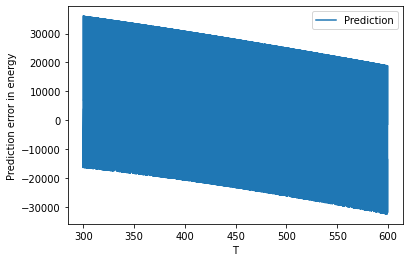

In [ ]:
plt.plot(x_test[:,0], pred, label='Prediction')
plt.ylabel('Prediction error in energy')
plt.xlabel('T')
plt.legend()
plt.savefig('liquid-prediction-energy-error'+save_string+'-.png')

In [ ]:
print(x_test.shape)

(23850, 4)


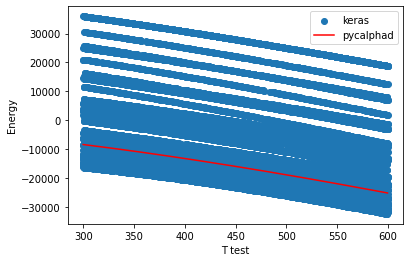

In [ ]:
plt.scatter(x_test[:,0], pred, label='keras')
plt.plot(x_test[:,0], resGM, label='pycalphad', color='r')
plt.ylabel('Energy')
plt.xlabel('T test')
plt.legend()
plt.savefig('liquid-prediction_and_pycalphad-energy-'+save_string+'-.png')

In [ ]:
starting_temp = 300
max_temp = 600
step = 0.5

save_string = str(starting_temp)+'-to-'+str(max_temp)+'-step-'+str(step)

Plots

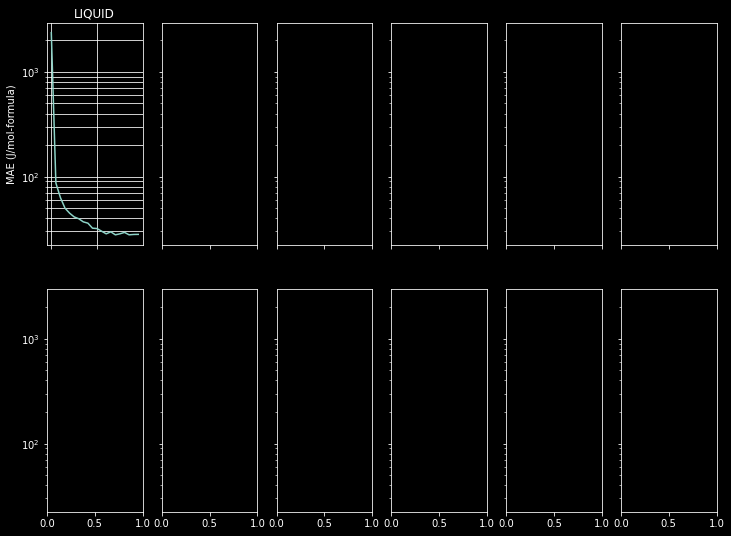

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

fig, axs = plt.subplots(2, len(dbf.phases) // 2, sharey=True, figsize=(12,9))

i = 0
for phase_name, x in results.items():
    ax = axs.flat[i]
    history = x[1]
    ax.plot(history.history['loss'])
    ax.set(xlabel='epoch', ylabel='MAE (J/mol-formula)', yscale='log')
    ax.set_title(phase_name)
    ax.grid(True, which='both')
    i += 1
for ax in axs.flat:
    ax.label_outer()

plt.savefig('All_phases'+save_string+'.png')

Checking the gradients

In [ ]:
# grad = tape.gradient(model, [x0, x1, x2, x3])

# #G + T dGdT

# model.evaluate()

Function to calculate thermodynamics quantities

In [ ]:

def ML_plots(dbf, comps, phase_name, fine_temps, pts):
    res = calculate(dbf, comps, phase_name, T=fine_temps, P=1e5, N=1, pdens=10, output='HM', points=pts)
    res.HM.shape
    res_SM = calculate(dbf, comps, phase_name, T=fine_temps, P=1e5, N=1, pdens=10, output='SM', points=pts)
    resSM = res_SM.SM
    res_GM = calculate(dbf, comps, phase_name, T=fine_temps, P=1e5, N=1, pdens=10, output='GM', points=pts)
    resGM = res_GM.GM
    tt, xx = np.broadcast_arrays(fine_temps[:, np.newaxis], np.squeeze(pts)[np.newaxis])
    inputs = np.concatenate((fine_temps[np.newaxis].T, xx), axis=1)
    gm_ml = model.predict(inputs)
    sm_ml = -np.gradient(gm_ml, fine_temps)
    hm_ml = gm_ml + fine_temps * sm_ml
    hm_ml = hm_ml[np.newaxis].T
    hm_ml.shape
    resHM = res.HM
    resSM = res_SM.SM
    resGM = res_GM.GM
    print(resHM.shape)
    print(resSM.shape)
    resHM = resHM[0,0,:,:]
    resSM = resSM[0,0,:,:]
    resGM = resGM[0,0,:,:]
    error_HM = resHM - hm_ml
    error_SM = resSM - sm_ml[np.newaxis].T
    error_GM = resGM - gm_ml[np.newaxis].T
    return resGM, resSM, resHM, error_GM, error_SM, error_HM

In progress: plotting all errors

In [ ]:
import numpy as np
import pycalphad
from pycalphad import Database, calculate, variables as v
import matplotlib.pyplot as plt

fine_temps = np.arange(starting_temp, max_temp, step)
print(fine_temps.shape)
pts = np.array([[[0.3, 0.3, 0.4]]])


plt.style.use('dark_background')

fig, axs = plt.subplots(2, len(dbf.phases) // 2, sharey=True, figsize=(12,9))

i = 0
for phase_name, x in results.items():
    resGM, resSM, resHM, error_GM, error_SM, error_HM = ML_plots(dbf, comps, phase_name, fine_temps, pts)
    ax = axs.flat[i]
    ax.plot(fine_temps, error_HM, label='error')
    ax.set_ylabel('HM.T')
    ax.set_xlabel('T')
    ax.legend()
    ax.set_title(phase_name)
    ax.grid(True, which='both')
    i += 1
for ax in axs.flat:
    ax.label_outer()

plt.savefig('All_phases_HM'+save_string+'.png')

In [15]:
import numpy as np
import pycalphad
from pycalphad import Database, calculate, variables as v
import matplotlib.pyplot as plt
# model = results['LIQUID'][0]

fine_temps = np.arange(starting_temp, max_temp, step)
print(fine_temps.shape)
pts = np.array([[[0.3, 0.3, 0.4]]])

res = calculate(dbf, comps, 'LIQUID', T=fine_temps, P=1e5, N=1, pdens=10, output='HM', points=pts)
res.HM.shape
res_SM = calculate(dbf, comps, 'LIQUID', T=fine_temps, P=1e5, N=1, pdens=10, output='SM', points=pts)
resSM = res_SM.SM
res_GM = calculate(dbf, comps, 'LIQUID', T=fine_temps, P=1e5, N=1, pdens=10, output='GM', points=pts)
resGM = res_GM.GM
tt, xx = np.broadcast_arrays(fine_temps[:, np.newaxis], np.squeeze(pts)[np.newaxis])
inputs = np.concatenate((fine_temps[np.newaxis].T, xx), axis=1)
gm_ml = model.predict(inputs)
sm_ml = -np.gradient(gm_ml, fine_temps)
hm_ml = gm_ml + fine_temps * sm_ml
hm_ml = hm_ml[np.newaxis].T
hm_ml.shape
resHM = res.HM
resSM = res_SM.SM
resGM = res_GM.GM
print(resHM.shape)
print(resSM.shape)
resHM = resHM[0,0,:,:]
resSM = resSM[0,0,:,:]
resGM = resGM[0,0,:,:]
error = resHM - hm_ml
error_SM = resSM - sm_ml[np.newaxis].T
error_GM = resGM - gm_ml[np.newaxis].T

(600,)
19/19 [==============================] - 0s 2ms/step
(1, 1, 600, 1)
(1, 1, 600, 1)


ML test

To get the ML values

test3
(None, 4)
10/10 [==============================] - 0s 3ms/step


(300, 1)

In [11]:
import tensorflow as tf

# gradients = tf.gradients(model.predict(inputs), inputs)

tfinputs = tf.convert_to_tensor(inputs)

with tf.GradientTape() as t:
  t.watch(tfinputs)
  output = model(tfinputs)

dz_dx = t.gradient(output, tfinputs)
print(dz_dx.numpy())
gradient_T = dz_dx.numpy()[:,0:1]
print(gradient_T.shape)
hm_ml_grad = gm_ml + fine_temps * gradient_T.T
hm_ml_grad = hm_ml_grad.T
hm_ml_grad.shape

[[-4.48280258e+01 -5.01981445e+04  5.62131152e+03 -2.69413945e+04]
 [-4.48703308e+01 -5.02035625e+04  5.60245996e+03 -2.69586328e+04]
 [-4.49126205e+01 -5.02089883e+04  5.58359863e+03 -2.69758867e+04]
 ...
 [-6.56618729e+01 -5.57101016e+04 -6.74463818e+03 -3.94730234e+04]
 [-6.56887741e+01 -5.57232188e+04 -6.76542773e+03 -3.94972734e+04]
 [-6.57156296e+01 -5.57363438e+04 -6.78621289e+03 -3.95215352e+04]]
(600, 1)


(600, 1)

To get the error

(1, 1, 300, 1)
(1, 1, 300, 1)


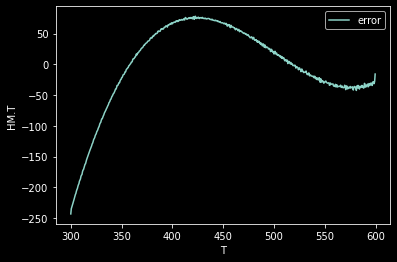

In [16]:
plt.plot(fine_temps, error, label='error')
plt.ylabel('HM.T')
plt.xlabel('T')
plt.legend()
plt.savefig('liquid-enthalpy-error'+save_string+'-.png')

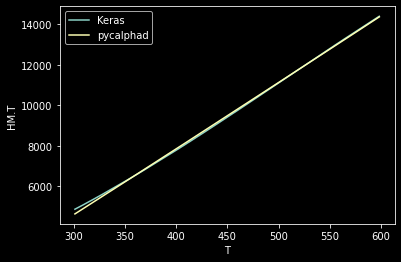

In [17]:
plt.plot(fine_temps[2:-2], hm_ml[2:-2], label='Keras')
plt.plot(fine_temps[2:-2], resHM[2:-2], label='pycalphad')
plt.ylabel('HM.T')
plt.xlabel('T')
plt.legend()
plt.savefig('liquid-enthalpy'+save_string+'.png')

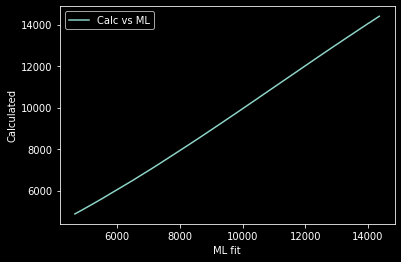

In [22]:
plt.plot(resHM[2:-2], hm_ml[2:-2], label='Calc vs ML')
plt.ylabel('Calculated')
plt.xlabel('ML fit')
plt.legend()
plt.savefig('liquid-enthalpy-calc_vs_ml-'+save_string+'.png')

Energy comparison

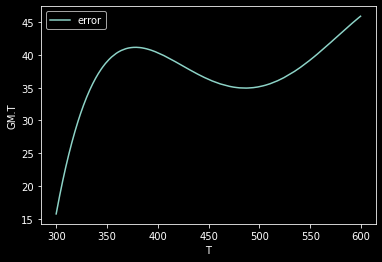

In [18]:
plt.plot(fine_temps, error_GM, label='error')
plt.ylabel('GM.T')
plt.xlabel('T')
plt.legend()
plt.savefig('liquid-energy-error'+save_string+'-.png')

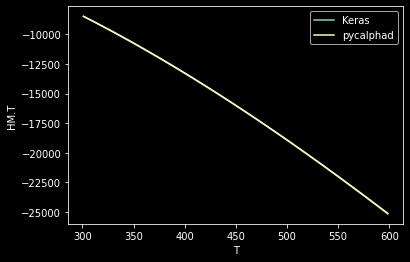

In [19]:
plt.plot(fine_temps[2:-2], gm_ml[2:-2], label='Keras')
plt.plot(fine_temps[2:-2], resGM[2:-2], label='pycalphad')
plt.ylabel('HM.T')
plt.xlabel('T')
plt.legend()
plt.savefig('liquid-energy'+save_string+'-.png')

Entropy comparison

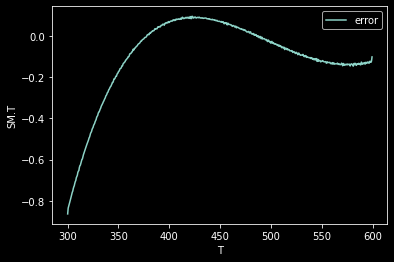

In [20]:
plt.plot(fine_temps, error_SM, label='error')
plt.ylabel('SM.T')
plt.xlabel('T')
plt.legend()
plt.savefig('liquid-entropy-error'+save_string+'-.png')

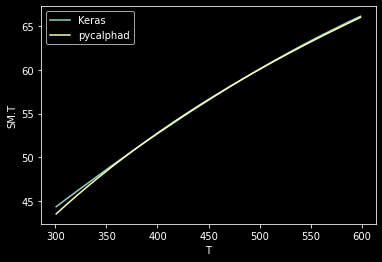

In [21]:
plt.plot(fine_temps[2:-2], sm_ml[2:-2], label='Keras')
plt.plot(fine_temps[2:-2], resSM[2:-2], label='pycalphad')
plt.ylabel('SM.T')
plt.xlabel('T')
plt.legend()
plt.savefig('liquid-entropy'+save_string+'.png')

In [18]:
# fine_temps = np.arange(300, 600, 10)


# res = calculate(dbf, comps[0], 'LIQUID', T=temp_range, P=1e5, N=1, model=mod, pdens=10, output='HM')

# # fine_energies = np.array([float(dbf.symbols['GHSERZN'].xreplace({v.T: t})) for t in fine_temps])
# # gm_calphad = fine_energies
# # sm_calphad = -np.gradient(gm_calphad, fine_temps)
# # hm_calphad = gm_calphad + fine_temps * sm_calphad
# # cpm_calphad = np.gradient(hm_calphad, fine_temps)

# gm_ml = model.predict(fine_temps)
# sm_ml = -np.gradient(gm_ml, fine_temps)
# hm_ml = gm_ml + fine_temps * sm_ml
# # cpm_ml = np.gradient(hm_ml, fine_temps)

# error = hm_ml-res.hm

# plt.plot(fine_temps[2:-2], cpm_ml[2:-2], label='Keras')
# plt.plot(fine_temps[2:-2], cpm_calphad[2:-2], label='pycalphad')
# plt.ylabel('HM.T')
# plt.xlabel('T')
# plt.legend()

NameError: name 'mod' is not defined